## Failed attempt on character detection

Since the dataset setting has some similarity with the object detection, we explore other object detection models as well. Although we didn't end up using the model for character detection, researching on this does let us learn more about the object detection field. Specifically, we try out the one-stage detectors to see the results.

Two-stage detectors firstly find region proposals using selective search algorithm or region proposal network, then classify the objects within the region proposals. On the other hand, one-stage detectors skip the regional proposal stage and directly predict object over a limited number of bounding boxes.

We employed the newest YOLO v3 model to do the character detection. The source code of the model is stored in: https://github.com/ultralytics/yolov3.git

YOLO v3 is a one-stage detector which is very good for real-time object detection. It has a faster training and inference process. It firstly uses a pretrained CNN for image classification to extract the image features. Then it divides image into N cells, where each cell is responsible for determining one object. It tries to optimize two losses: localization loss for the bounding box prediction and classification loss for classifying characters.

At first, we try to reach our goal in one run. We combine character detection and classification together regarding each character as one class, but that attempt ends up badly. The model cannot learn anything because there are nearly 4700+ characters and the dataset is highly unbalanced. The F1 is nearly zero.

After that, we decide to predict only one class and the results are much better. But still, the performance is far from satisfaction.

I have tried the following methods to increase accuracy:

1. Increase network size (Help with detecting small objects)
2. Using kmeans algorithm to get different anchor boxes for my dataset (Anchor boxes are used for giving the model a sense of the popular width:height ratio)

The training process can be observed from the below graph.

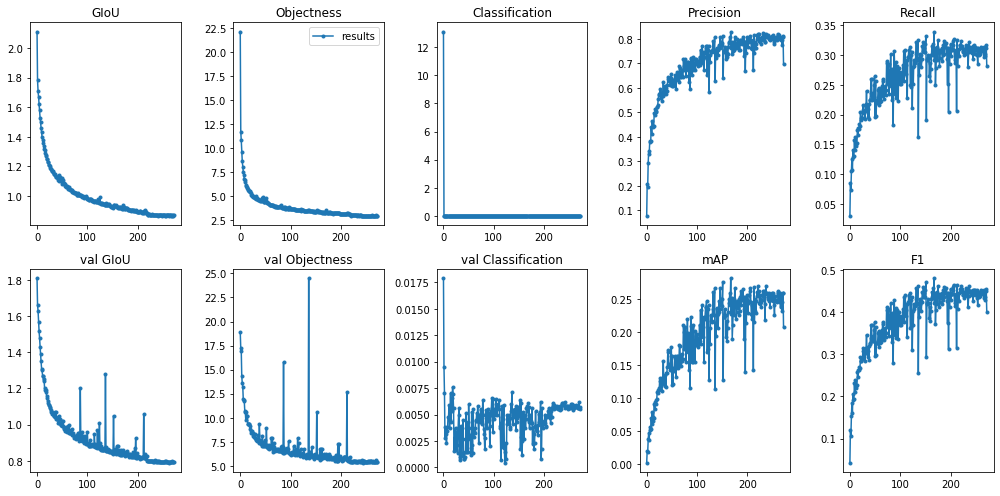

In [2]:
from utils import utils; utils.plot_results()

We also visualize the detection results using detect.py in yolov3.

Here is one detection result:
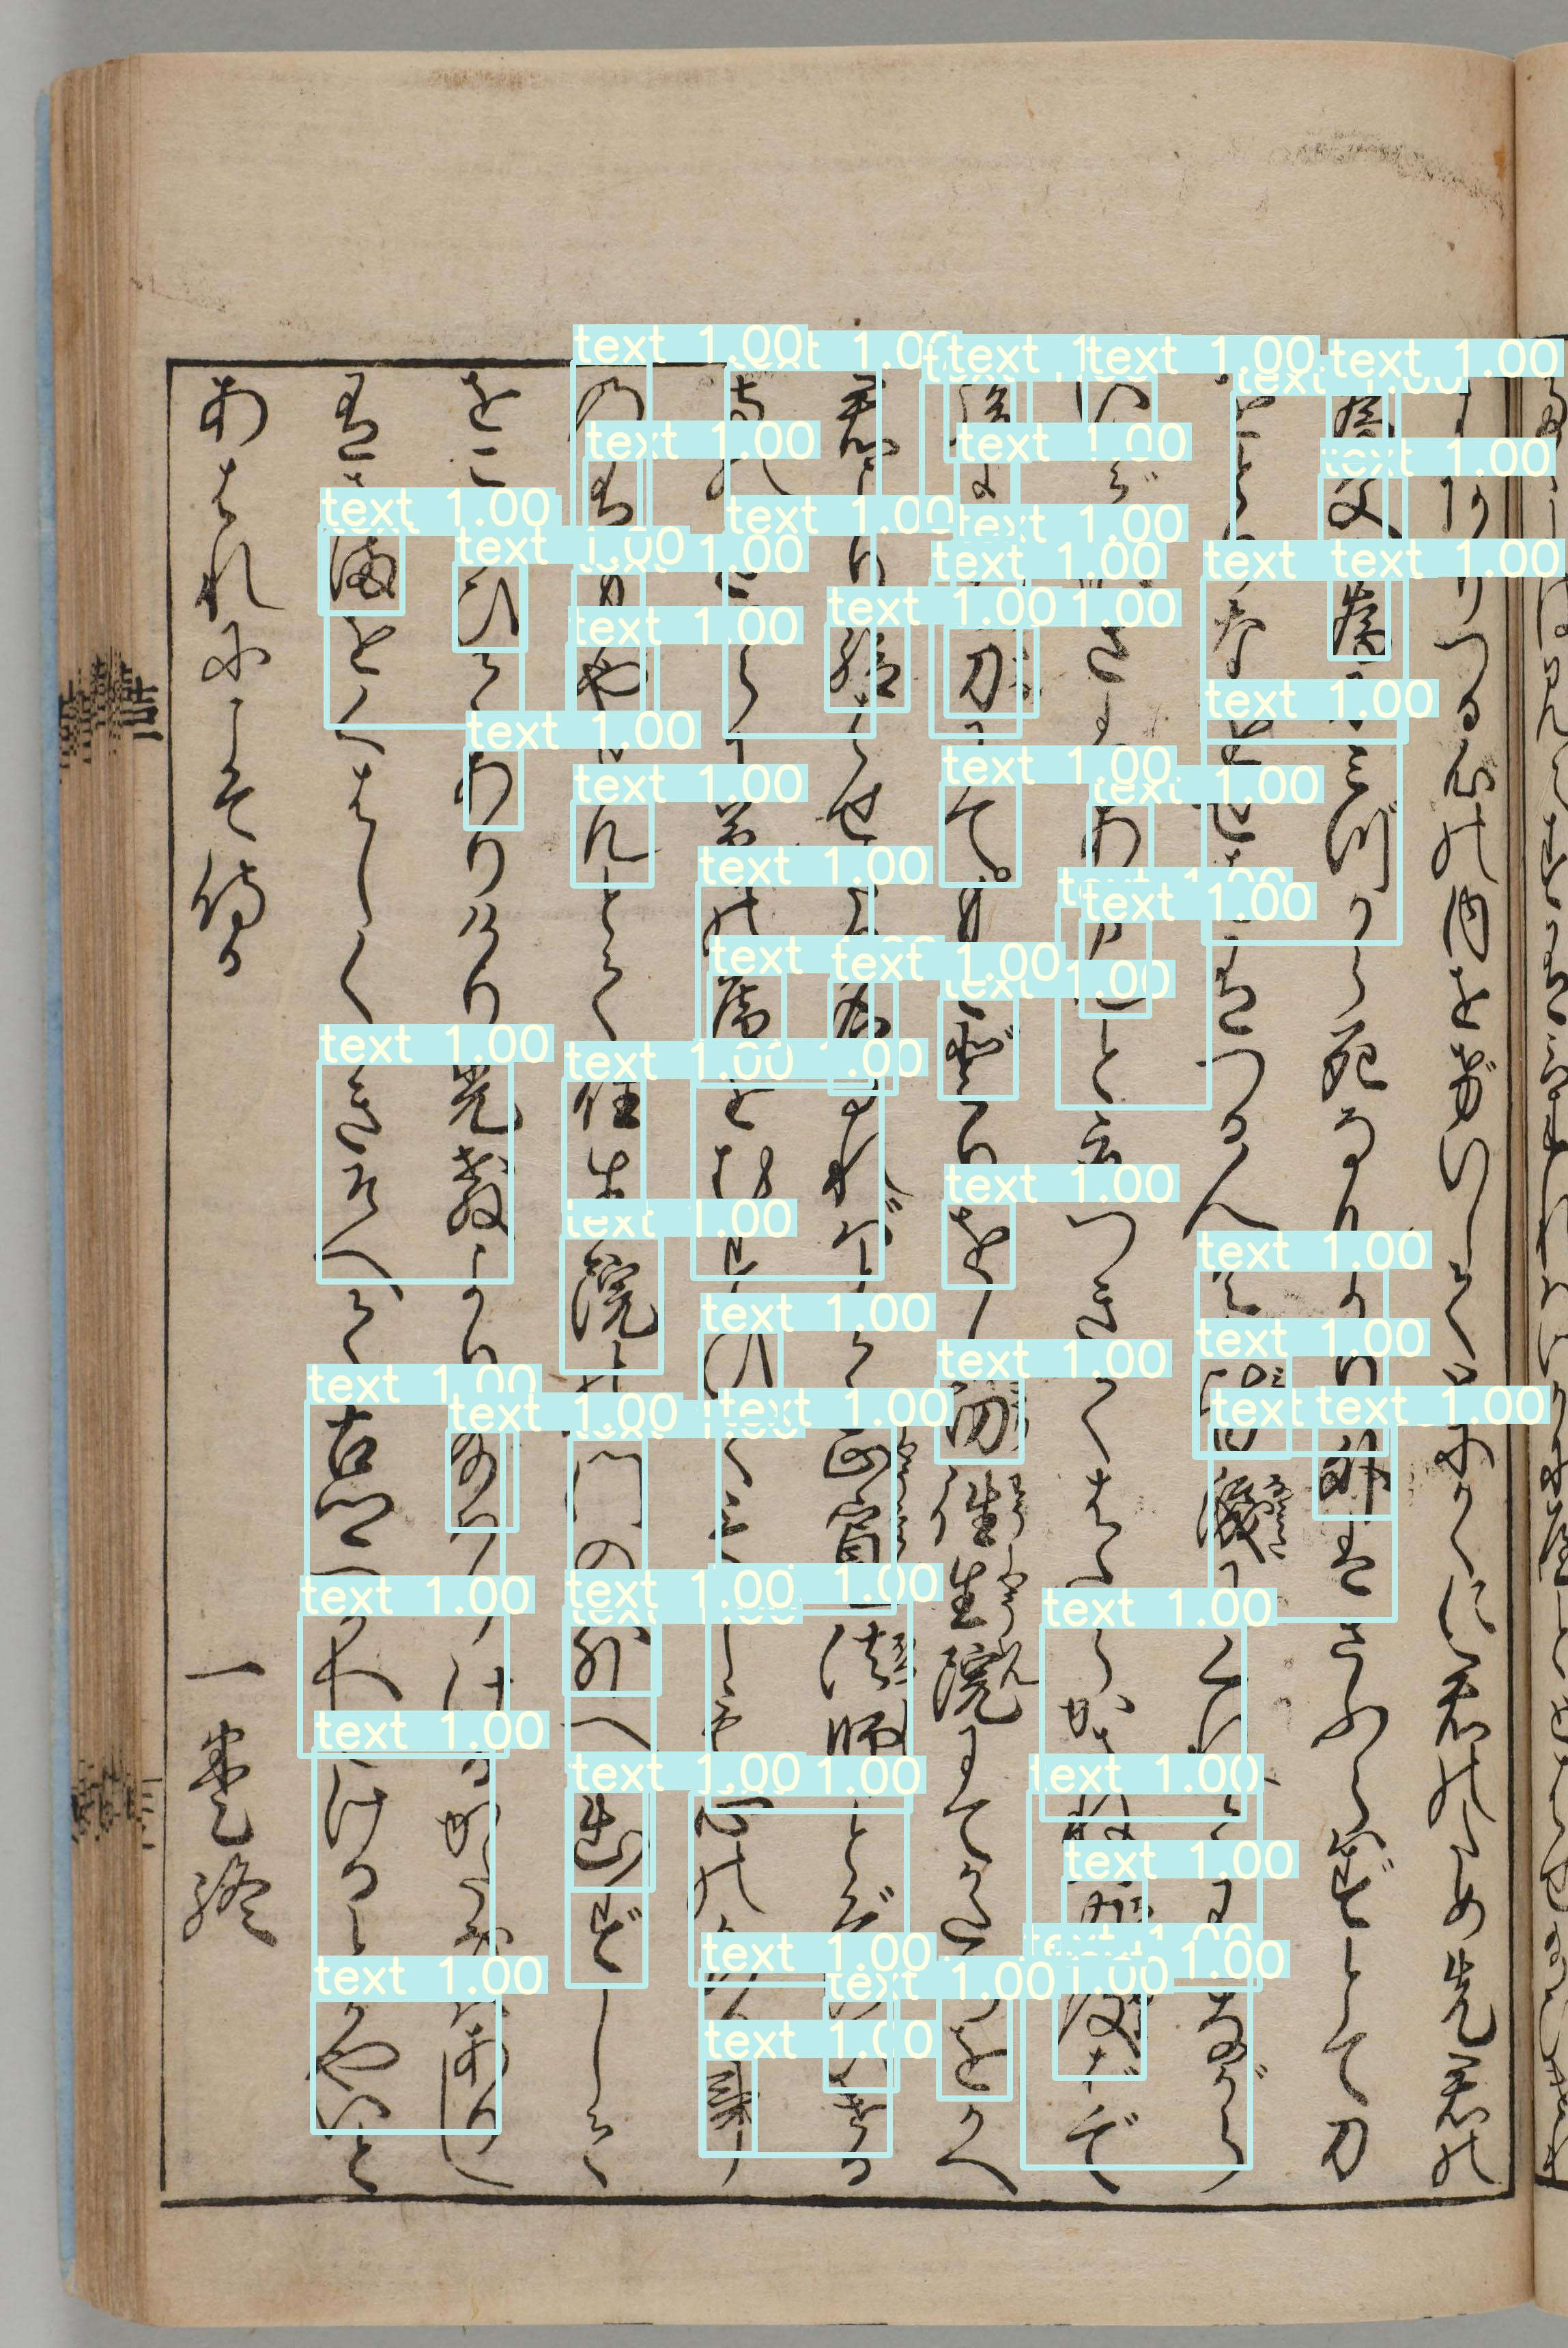

We can see that although the accuracy is high, only part of the characters are recognized. This behavior may be due to the constraint of fixed number of bounding box per cell. But we cannot further validate our assumptions so we have to leave it for future work.